In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [2]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'Anger': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'Disgust':
            label = 4
        elif labels == 'Fear':
            label = 0
        elif labels == 'Happiness':
            label = 1
        elif labels == 'Neutral':
            label = 5
        elif labels == 'Sadness':
            label = 3
        elif labels == 'Surprise':
            label = 6    
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'Anger', 4:'Disgust', 0:'Fear', 1:'Happiness', 5:'Neutral', 3:'Sadness', 6:'Surprise'}
    
    return labels[class_code]

In [4]:
Images, Labels = get_images('./dataset/train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

### 추출한 이미지 저장

In [8]:
# np.savez_compressed('imageclassification',x=Images, y=Labels)

In [11]:
imagesavez = np.load('./imageclassification.npz')
Images = imagesavez['x']
Labels = imagesavez['y']

In [12]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (113504, 150, 150, 3)
Shape of Labels: (113504,)


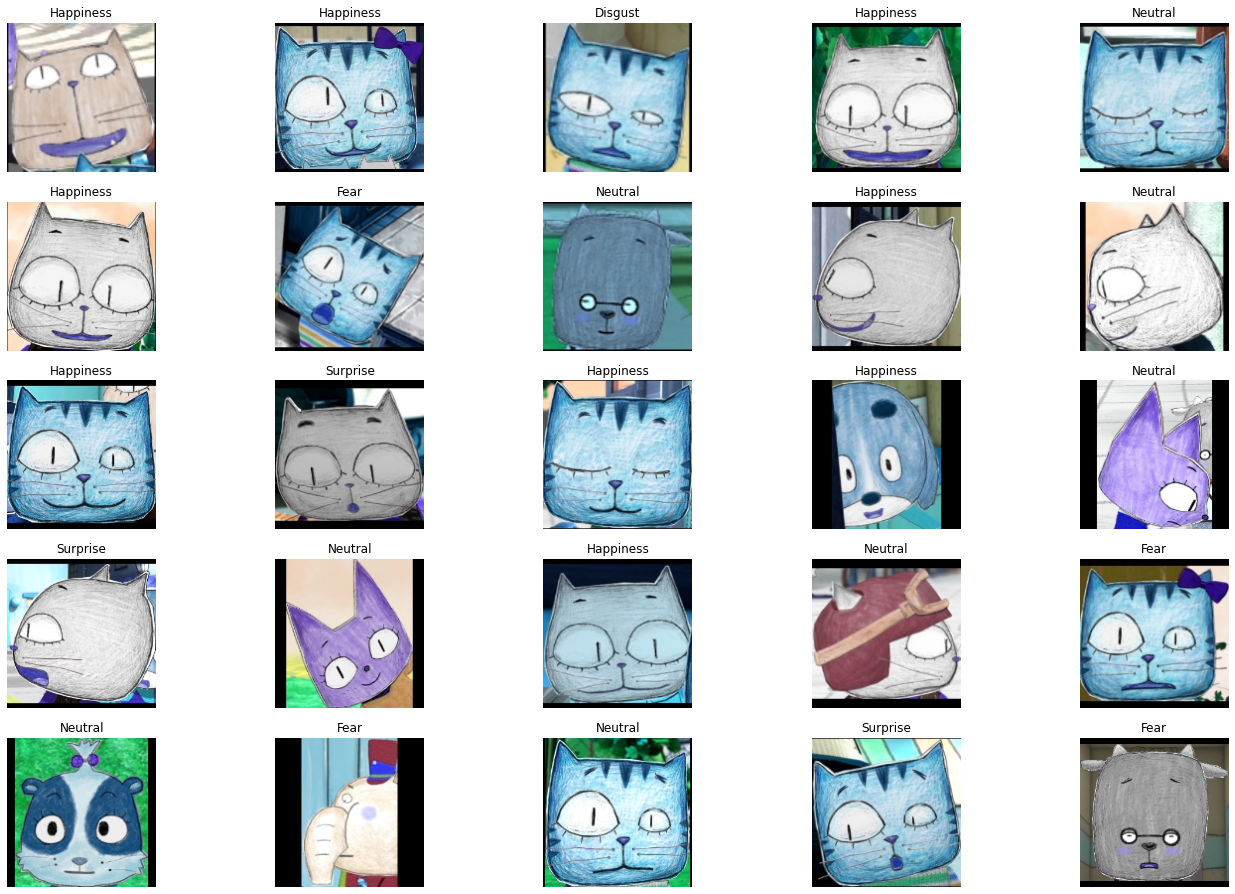

In [13]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 100)       126100    
                                                        

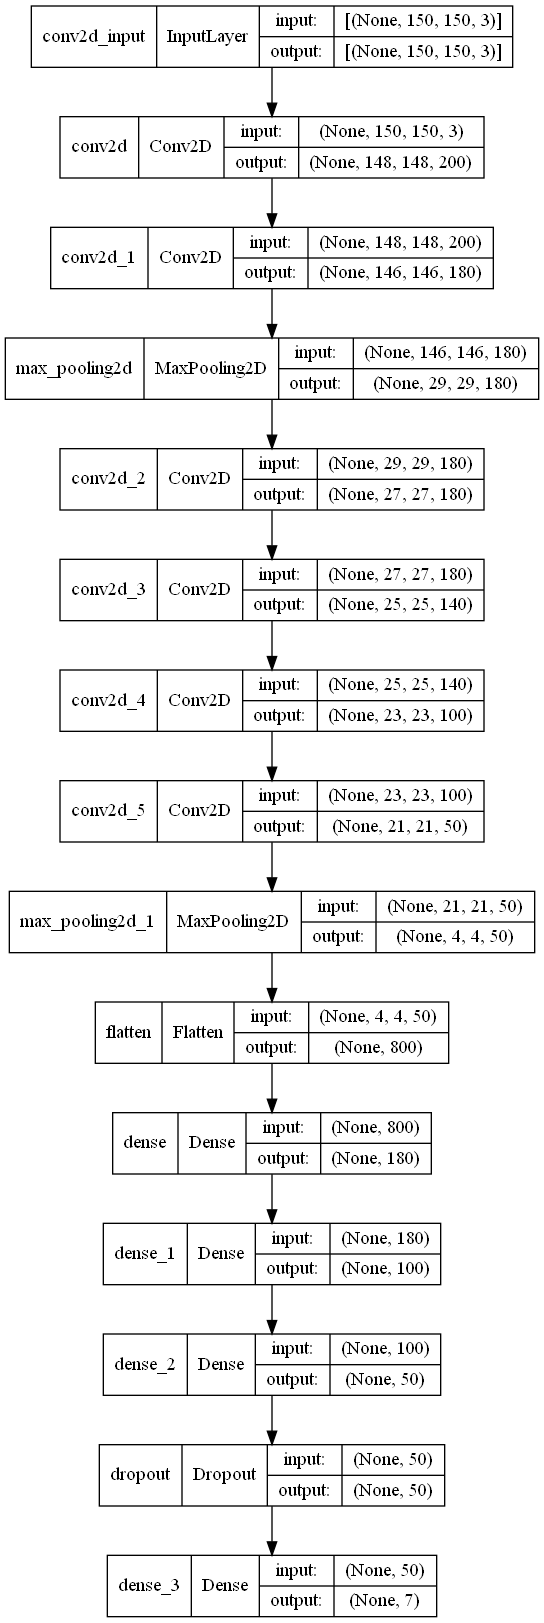

In [14]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(7,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [16]:
trained = model.fit(Images[0:3000],Labels[0:3000],batch_size = 10,epochs=50,validation_split=0.30)
# 컴퓨터사양 이슈로인한 배치사이즈, 데이터크기 조정

Epoch 1/50
210/210 [==============================] - 15s 69ms/step - loss: 1.4788 - accuracy: 0.4243 - val_loss: 1.5489 - val_accuracy: 0.4056
Epoch 2/50
210/210 [==============================] - 14s 69ms/step - loss: 1.4597 - accuracy: 0.4333 - val_loss: 1.5063 - val_accuracy: 0.4156
Epoch 3/50
210/210 [==============================] - 15s 69ms/step - loss: 1.4254 - accuracy: 0.4510 - val_loss: 1.5073 - val_accuracy: 0.4222
Epoch 4/50
210/210 [==============================] - 15s 69ms/step - loss: 1.4004 - accuracy: 0.4481 - val_loss: 1.5135 - val_accuracy: 0.4167
Epoch 5/50
210/210 [==============================] - 14s 69ms/step - loss: 1.3651 - accuracy: 0.4752 - val_loss: 1.4901 - val_accuracy: 0.4100
Epoch 6/50
210/210 [==============================] - 14s 69ms/step - loss: 1.3594 - accuracy: 0.4719 - val_loss: 1.5199 - val_accuracy: 0.4367
Epoch 7/50
210/210 [==============================] - 14s 69ms/step - loss: 1.3133 - accuracy: 0.4838 - val_loss: 1.5185 - val_accuracy:

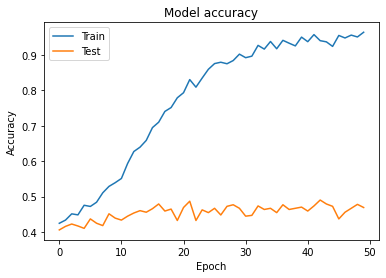

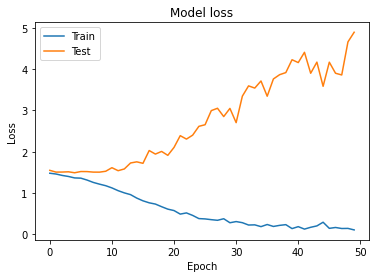

In [29]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [26]:
test_images,test_labels = get_images('./dataset/test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

394/394 [==============================] - 17s 40ms/step - loss: 4.7142 - accuracy: 0.4824


[4.714223861694336, 0.48235106468200684]